In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [ ]:
uploaded=files.upload()

In [36]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    data = pd.read_csv(f"data/{filename}/{filename}")
    labels = data.label.values
    images = data.drop('label', axis=1).values
    images = images.reshape(len(data), 28, 28)
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [38]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images =  training_images.reshape(-1, 28,28,1)
testing_images = testing_images.reshape(-1, 28, 28, 1)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  rotation_range=40,
                                  width_shift_range=.2,
                                  height_shift_range=.2,
                                  shear_range=.2,
                                  zoom_range=.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [48]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(strides=2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels,
                             batch_size=32), epochs=15,
                             validation_data=validation_datagen.flow(testing_images, testing_labels,
                                                                    batch_size=32))

Epoch 1/15
858/858 [==============================] - 29s 34ms/step - loss: 2.8907 - acc: 0.1313 - val_loss: 2.0065 - val_acc: 0.3678
Epoch 2/15
858/858 [==============================] - 29s 34ms/step - loss: 2.1387 - acc: 0.3222 - val_loss: 1.4393 - val_acc: 0.5067
Epoch 3/15
858/858 [==============================] - 29s 34ms/step - loss: 1.8034 - acc: 0.4215 - val_loss: 1.1886 - val_acc: 0.5906
Epoch 4/15
858/858 [==============================] - 29s 33ms/step - loss: 1.5931 - acc: 0.4851 - val_loss: 1.1096 - val_acc: 0.6287
Epoch 5/15
858/858 [==============================] - 29s 33ms/step - loss: 1.4351 - acc: 0.5362 - val_loss: 0.8935 - val_acc: 0.6903
Epoch 6/15
858/858 [==============================] - 29s 33ms/step - loss: 1.3390 - acc: 0.5649 - val_loss: 0.8254 - val_acc: 0.7101
Epoch 7/15
858/858 [==============================] - 29s 33ms/step - loss: 1.2445 - acc: 0.5942 - val_loss: 0.8131 - val_acc: 0.7175
Epoch 8/15
858/858 [==============================] - 29s 33ms

In [49]:
model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]

7172/7172 [==============================] - 2s 265us/sample - loss: 170.1514 - acc: 0.6117


[170.1513963945073, 0.6116843]

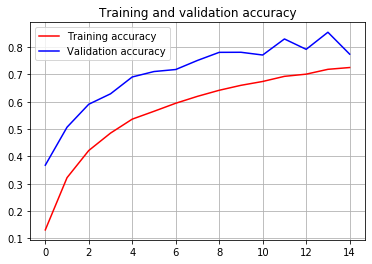

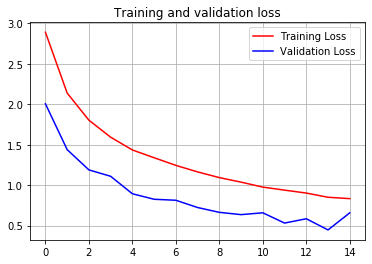

In [50]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()